In [207]:
import matplotlib.pyplot as plt
import pandas as pd

N_SCENARIOS = 8

In [214]:
def draw_plot_multi(ax: "plt.Axes", dataset: "pd.DataFrame", scenarios: int, label: str):
    sum_real = sum([dataset[f"real_{scenario}"] for scenario in range(scenarios)])
    sum_min = sum([dataset[f"min_{scenario}"] for scenario in range(scenarios)])
    sum_max = sum([dataset[f"max_{scenario}"] for scenario in range(scenarios)])
    ax.plot(sum_real, label=label)
    ax.plot(dataset["f_value"], label=f"f_{label}")
    ax.fill_between(dataset.index, sum_min, sum_max, alpha=0.2)


(0.0, 41146.0)

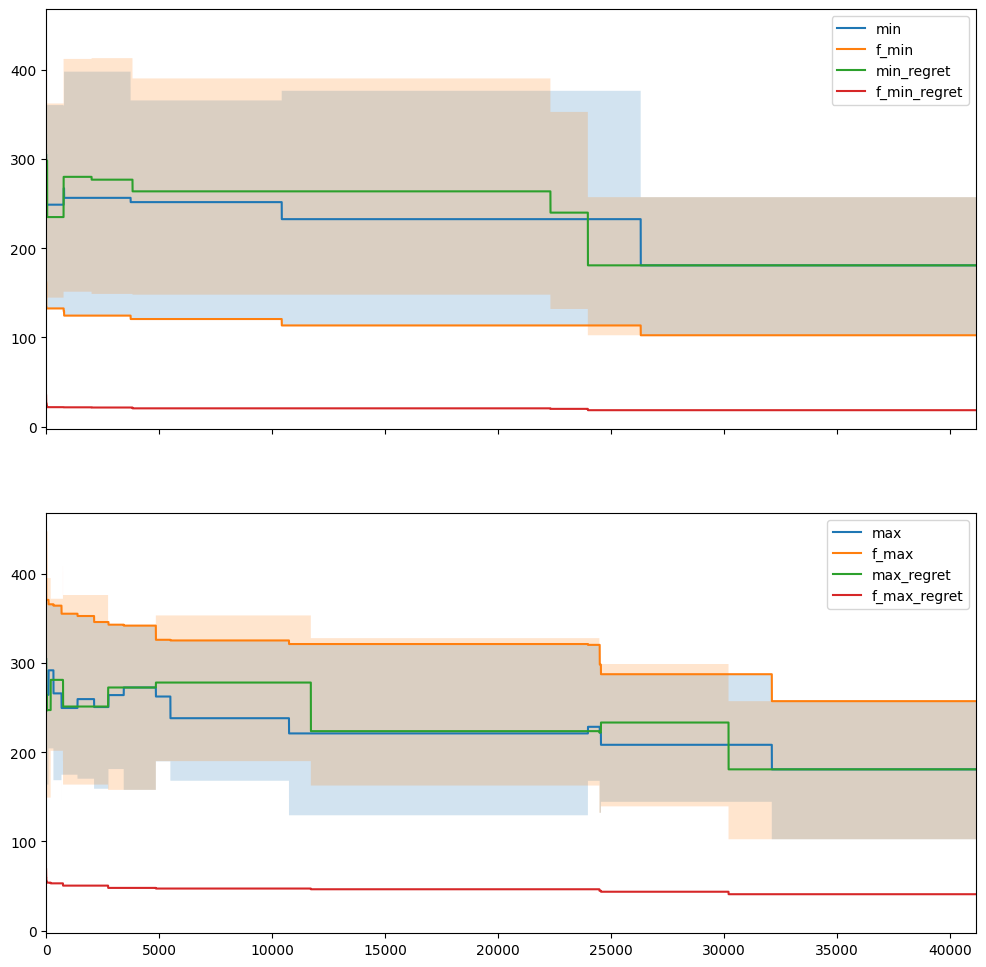

In [231]:
dataset = {}
max_length = 0
for item in ["min", "max", "mean", "regret_min", "regret_max"]:
    dataset[item] = pd.read_csv(f"../temp/{item}.csv", index_col=0)
    if max_length < dataset[item].index[-1]:
        max_length = dataset[item].index[-1]

for item in ["min", "max", "mean", "regret_min", "regret_max"]:
    dataset[item] = dataset[item].reindex(list(range(0, max_length))).bfill().ffill()

fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharey=True, sharex=True)
_ = draw_plot_multi(ax[0], dataset["min"], N_SCENARIOS, "min")
_ = draw_plot_multi(ax[0], dataset["regret_min"], N_SCENARIOS, "min_regret")
_ = draw_plot_multi(ax[1], dataset["max"], N_SCENARIOS, "max")
_ = draw_plot_multi(ax[1], dataset["regret_max"], N_SCENARIOS, "max_regret")
ax[0].legend()
ax[1].legend()
low, high = ax[0].get_xlim()
ax[0].set_xlim(0, dataset["min"].index[-1])
# ax[0].set_xlim(0, 10000)
# ax[1].set_xlim(0, 10000)